# Comparing PCA, tSNE, UMAP
On this notebook we will compare 3 clustering/dimensionality reduction methods, using the world-map as dataset.
#### References
* https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17
* https://towardsdatascience.com/guide-to-dimensionality-reduction-in-single-cell-rna-seq-analysis-1d77284eed1c
* [Original Implementation](https://github.com/NikolayOskolkov/tSNE_vs_UMAP_GlobalStructure/blob/master/tSNE_vs_UMAP.ipynb)

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

# Load Data
with open('../data/world_map.pickle', 'rb') as handle:
    world_map = pickle.load(handle)
    
feat = world_map['features']
labels = world_map['labels']
print('Features shape:', feat.shape)

Features shape: (3023, 2)


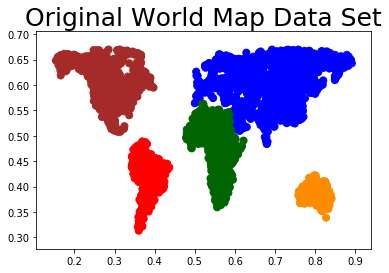

In [2]:
plt.scatter(feat[:, 0], feat[:, 1], c = labels, s = 50)
plt.title('Original World Map Data Set', fontsize = 25)
plt.show()

#### Using PCA
Observe for a linear manifold, PCA preserve the clusters, and distance between clusters

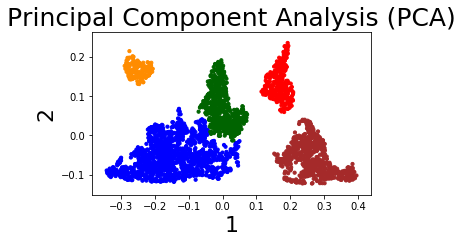

In [3]:
X_reduced = PCA(n_components = 2).fit_transform(feat)
plt.figure(figsize=(5,3))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = labels, s = 10)
plt.title('Principal Component Analysis (PCA)', fontsize = 25)
plt.xlabel("1", fontsize = 22)
plt.ylabel("2", fontsize = 22)
plt.show()

#### Using tSNE
Observe that the original structure and distance between clusters got perturbated

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 3023 samples in 0.001s...
[t-SNE] Computed neighbors for 3023 samples in 0.947s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3023
[t-SNE] Computed conditional probabilities for sample 2000 / 3023
[t-SNE] Computed conditional probabilities for sample 3000 / 3023
[t-SNE] Computed conditional probabilities for sample 3023 / 3023
[t-SNE] Mean sigma: 0.060978
[t-SNE] Computed conditional probabilities in 4.058s
[t-SNE] Iteration 50: error = 43.8276901, gradient norm = 0.0025554 (50 iterations in 2.760s)
[t-SNE] Iteration 100: error = 43.6701393, gradient norm = 0.0001747 (50 iterations in 3.193s)
[t-SNE] Iteration 150: error = 43.6742897, gradient norm = 0.0002149 (50 iterations in 3.093s)
[t-SNE] Iteration 200: error = 43.6758194, gradient norm = 0.0004383 (50 iterations in 3.111s)
[t-SNE] Iteration 250: error = 43.6758957, gradient norm = 0.0001415 (50 iterations in 3.120s)
[t-SNE] KL divergence after 250 itera

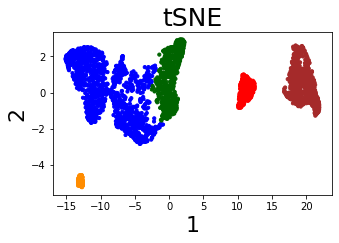

In [4]:
X_reduced = PCA(n_components = 2).fit_transform(feat)
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, perplexity = 500, 
             init = X_reduced, n_iter = 1000, verbose = 2)
tsne = model.fit_transform(feat)
plt.figure(figsize=(5,3))
plt.scatter(tsne[:, 0], tsne[:, 1], c = labels, s = 10)
plt.title('tSNE', fontsize = 25); plt.xlabel("1", fontsize = 22); plt.ylabel("2", fontsize = 22)
plt.show()

#### UMAP
UMAP preserve more structure than T-SNE, runs faster but perform worst than PCA on this dataset.

UMAP(a=None, angular_rp_forest=False, b=None,
     init=array([[ 0.25580736, -0.08346226],
       [ 0.21164187, -0.0044089 ],
       [ 0.25814581,  0.02748583],
       ...,
       [-0.04541859,  0.06084731],
       [ 0.03837112,  0.01024752],
       [-0.01219052,  0.02886706]]),
     learning_rate=1, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=1, n_components=2, n_epochs=1000,
     n_neighbors=500, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Thu Apr  9 14:05:28 2020 Finding Nearest Neighbors
Thu Apr  9 14:05:29 2020 Finished Nearest Neighbor Search
Thu Apr  9 14:05:33 2020 Construct embedding
	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  30

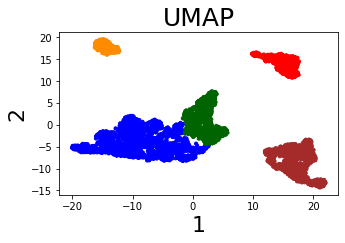

In [5]:
from umap import UMAP
X_reduced = PCA(n_components = 2).fit_transform(feat)
model = UMAP(learning_rate = 1, n_components = 2, min_dist = 1, n_neighbors = 500, 
             init = X_reduced, n_epochs = 1000, verbose = 2)
umap = model.fit_transform(feat)
plt.figure(figsize=(5,3))
plt.scatter(umap[:, 0], umap[:, 1], c = labels, s = 10)
plt.title('UMAP', fontsize = 25); plt.xlabel("1", fontsize = 22); plt.ylabel("2", fontsize = 22)
plt.show()

#### Extending dimensions
With more dimensions (or features), some issues might appear if the points cross-over into one dimension. 

Features shape extended: (3023, 3)


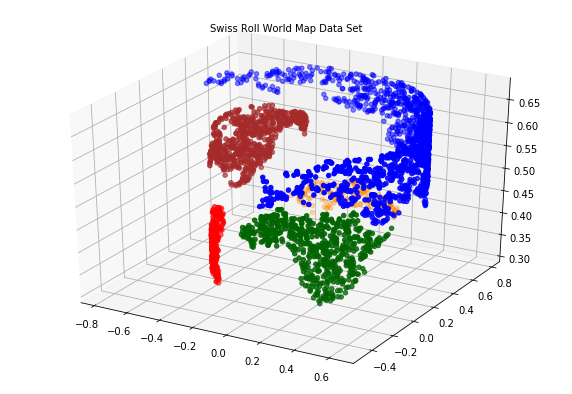

In [6]:
z_3d = feat[:, 1]
x_3d = feat[:, 0] * np.cos(feat[:, 0]*10)
y_3d = feat[:, 0] * np.sin(feat[:, 0]*10)

feat_swiss_roll = np.array([x_3d, y_3d, z_3d]).T
print('Features shape extended:', feat_swiss_roll.shape)

plt.figure(figsize=(10,7))
ax = plt.axes(projection = '3d')
ax.scatter3D(feat_swiss_roll[:, 0], feat_swiss_roll[:, 1], feat_swiss_roll[:, 2], c = labels)
plt.title('Swiss Roll World Map Data Set', fontsize = 10);
plt.show()

#### Using PCA
Here we can observe where PCA really fails, the algorithm can't cluster (Blue and green, and orange) together, and the distances between clusters are lost.

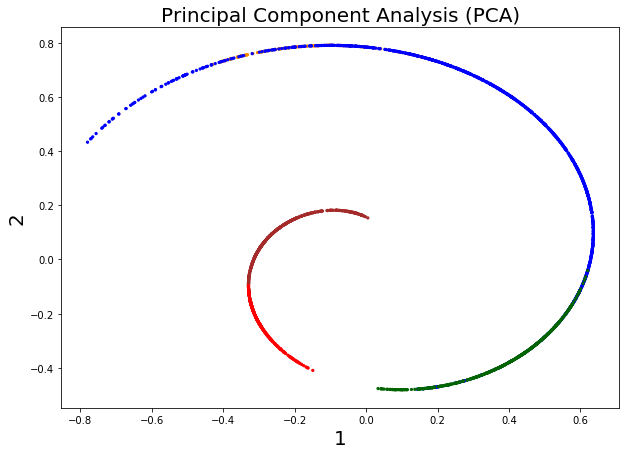

In [7]:
X_swiss_roll_reduced = PCA(n_components = 2).fit_transform(feat_swiss_roll)
plt.figure(figsize=(10,7))
plt.scatter(feat_swiss_roll[:, 0], feat_swiss_roll[:, 1], c = labels, s = 5)
plt.title('Principal Component Analysis (PCA)', fontsize = 20)
plt.xlabel("1", fontsize = 20); plt.ylabel("2", fontsize = 20)
plt.show()

#### Using tSNE
tSNE can find clusters, somehow recover the shapes ..., but observe that it split asia in 2 blobs of clusters.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3023 samples in 0.002s...
[t-SNE] Computed neighbors for 3023 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3023
[t-SNE] Computed conditional probabilities for sample 2000 / 3023
[t-SNE] Computed conditional probabilities for sample 3000 / 3023
[t-SNE] Computed conditional probabilities for sample 3023 / 3023
[t-SNE] Mean sigma: 0.033405
[t-SNE] Computed conditional probabilities in 0.408s
[t-SNE] Iteration 50: error = 56.7304153, gradient norm = 0.0189936 (50 iterations in 0.361s)
[t-SNE] Iteration 100: error = 54.1616211, gradient norm = 0.0130908 (50 iterations in 0.333s)
[t-SNE] Iteration 150: error = 53.1553764, gradient norm = 0.0095972 (50 iterations in 0.347s)
[t-SNE] Iteration 200: error = 52.6114273, gradient norm = 0.0104257 (50 iterations in 0.354s)
[t-SNE] Iteration 250: error = 52.2692986, gradient norm = 0.0080654 (50 iterations in 0.360s)
[t-SNE] KL divergence after 250 iterat

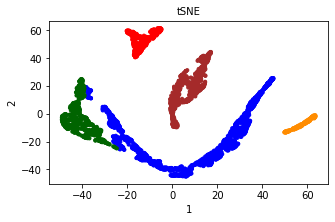

In [8]:
X_swiss_roll_reduced = PCA(n_components = 2).fit_transform(feat_swiss_roll)
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, perplexity = 50, 
             init = X_swiss_roll_reduced, n_iter = 1000, verbose = 2)
tsne = model.fit_transform(feat_swiss_roll)
plt.figure(figsize=(5,3))
plt.scatter(tsne[:, 0], tsne[:, 1], c = labels, s = 10)
plt.title('tSNE', fontsize = 10); plt.xlabel("1", fontsize = 10); plt.ylabel("2", fontsize = 10)
plt.show()

#### Using UMAP
UMAP could find the correct number of clusters and preserve distance with less errors.

UMAP(a=None, angular_rp_forest=False, b=None,
     init=array([[ 0.12535979,  0.40356518],
       [ 0.00599581,  0.49934623],
       [ 0.12201155,  0.40671414],
       ...,
       [-0.43454162, -0.28447539],
       [-0.55506668,  0.15485573],
       [-0.53099092, -0.11675039]]),
     learning_rate=1, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=1, n_components=2, n_epochs=1000,
     n_neighbors=500, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Thu Apr  9 14:06:22 2020 Finding Nearest Neighbors
Thu Apr  9 14:06:22 2020 Finished Nearest Neighbor Search
Thu Apr  9 14:06:24 2020 Construct embedding
	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  30

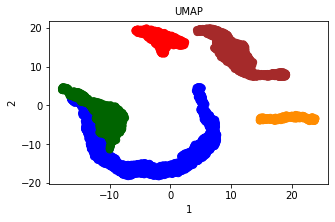

In [9]:
X_swiss_roll_reduced = PCA(n_components = 2).fit_transform(feat_swiss_roll)
model = UMAP(learning_rate = 1, n_components = 2, min_dist = 1, n_neighbors = 500, 
             init = X_swiss_roll_reduced, n_epochs = 1000, verbose = 2)
umap = model.fit_transform(feat_swiss_roll)
plt.figure(figsize=(5,3))
plt.scatter(umap[:, 0], umap[:, 1], c = labels, s = 50)
plt.title('UMAP', fontsize = 10); plt.xlabel("1", fontsize = 10); plt.ylabel("2", fontsize = 10)
plt.show()